In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Importing required libraries

In [3]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [4]:
pd.set_option('display.max_columns', None)

# Merging all datasets

In [5]:
old_path = os.getcwd()

file_names = []

# Iterating through the directories
for folder in os.listdir():
    
    # Iterating through only folders and ignoring hidden files if any
    if os.path.isdir(folder) and not folder.startswith('.'):
        
        # Changing the directory to get the files
        os.chdir(folder)
        
        try:
            # Importing all files
            for file in os.listdir():
                file_names.append(folder + '/' + file)
                
        except:
            print('Error Occured while importing: {} file'.format(file))
            os.chdir(old_path)
        
        # Returning the parent directory
        os.chdir(old_path)

# To store dataframes
dataframes = {}

for file_name in file_names:
    dataframes[file_name.split(".")[0]] = pd.read_csv(os.getcwd() + '/' + file_name, skiprows = 2)
    
dataset = None

# Merging all dataframes excluding few columns to aviod duplicate columns
for df_name, df in dataframes.items():
    columns_to_exclude = ['Year', 'County', 'State', 'Diagnosed Diabetes Percentage']
    columns_to_merge = [col for col in df.columns if col not in columns_to_exclude]

    if dataset is None:
        dataset = df[columns_to_merge]
        
    else:
        dataset = pd.merge(dataset, df[columns_to_merge], on = 'County_FIPS', how = 'inner', suffixes = ('', '_remove'))
    
# To drop last row
dataset = dataset[:-1]

In [6]:
# Changing the directory to grab obesity, inactivity, and diabetes files
os.chdir('C:/Users/pooja/OneDrive/Documents/university/sem-2/Mth-552')

obesity = pd.read_excel('cdc-diabetes-2018.xlsx', sheet_name = 'Obesity')
obesity.drop(['YEAR'], axis = 1, inplace = True)

inactivity = pd.read_excel('cdc-diabetes-2018.xlsx', sheet_name = 'Inactivity')
inactivity.rename(columns = {'FIPDS': 'FIPS'}, inplace = True)
inactivity.drop(['YEAR'], axis = 1, inplace = True)

diabetes = pd.read_excel('cdc-diabetes-2018.xlsx', sheet_name = 'Diabetes')
diabetes.drop(['YEAR'], axis = 1, inplace = True)

# Changing the directory to project directory
os.chdir(old_path)

common_column = 'FIPS'

temp_dataset = pd.merge(obesity, inactivity, on=common_column, how='inner', suffixes= ('', '_remove'))
temp_dataset = pd.merge(temp_dataset, diabetes, on=common_column, how='inner', suffixes= ('', '_remove'))

# Removing the duplicate columns
columns_to_remove = [column for column in dataset.columns if '_remove' in column]
dataset.drop(columns_to_remove, axis = 1, inplace = True)

columns_to_remove = [column for column in temp_dataset.columns if '_remove' in column]
temp_dataset.drop(columns_to_remove, axis = 1, inplace = True)
temp_dataset.drop(['STATEW'], axis = 1, inplace = True)

# Renaming the FIPS to County_FIPS to merge the datasets: temp_dataset and dataset
temp_dataset.rename(columns = {'FIPS': 'County_FIPS'}, inplace = True)
temp_dataset['County_FIPS'] = temp_dataset['County_FIPS'].astype('float64')

# This will be our final dataset to perform analysis
final_dataset = pd.merge(temp_dataset, dataset, on = 'County_FIPS', how = 'inner')
final_dataset

,County_FIPS,COUNTY,STATE,% OBESE,% INACTIVE,% DIABETIC,Children in Poverty,Household with No Internet Service,Severe Housing Cost Burden,Enrolled in Free or Reduced Lunch,Food Environment Index,Food Insecurity,Limited Access To Healthy Foods,Dentists per 100000 Population,No Health Insurance,Number of Dentists,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population,Access to Exercise Opportunities,Aged 17 or Younger,Civilian with a Disability,Crowding,Group Quarters,Aged 65 or Older,Minority,Mobile Homes,No Vehicle,Overall Household Composition & Disability,Multi-Unit Structures,Overall Minority Status & Language,Overall Socioeconomic Status,Overall SVI,Single-Parent Households,Below Poverty,Income Vulnerability,No High School Diploma,Unemployed,Speaks English 'Less than Well',Commute ≥ 60 min,Urban_Rural
0,1011.0,Bullock County,Alabama,18.7,17.0,9.4,38.7,30.7,12.759643917,75.462645648,4.6,15.7,32.339190387,20.04812,11.4,2,3,29.70003,1.878321422,0.2967,0.3983,0.0000,0.7689,0.2572,0.9809,0.9637,0.9500,0.4438,0.3200,0.6749,0.9771,0.8898,0.9955,0.9777,0.8924,0.9491,0.9599,0.2970,11.9,Rural
1,2068.0,Denali Borough,Alaska,18.9,16.2,6.8,7.2,6.2,7.2135785007,1.2084592145,4.6,15.1,33.09144787,No Data,18.5,No Data,No Data,No Data,44.359255203,0.0022,0.3200,0.6049,0.9971,0.0022,0.5492,0.4390,0.1210,0.0032,0.4448,0.4540,0.1561,0.101,0.0134,0.6443,0.0901,0.0010,0.1245,0.3582,6.3,Rural
2,2105.0,Hoonah-Angoon Census Area,Alaska,19.4,15.0,7.3,23.2,33.9,6.432748538,62.711864407,4.8,14.9,31.130174061,No Data,24.7,No Data,No Data,No Data,No Data,0.0210,0.5005,0.8198,0.8822,0.6428,0.9124,0.2569,0.9946,0.2139,0.0844,0.4575,0.3344,0.4178,0.4330,0.1675,0.0844,0.2305,0.9561,0.0000,2.5,Rural
3,2195.0,Petersburg Census Area,Alaska,17.2,17.8,9.2,9.4,15.6,10.127659574,56.076759062,8.3,12.7,0.6674929034,91.01942,9.6,3,6,183.71096,No Data,0.5151,0.7434,0.7622,0.5769,0.7947,0.7711,0.4830,0.9844,0.8927,0.6399,0.7657,0.1643,0.665,0.5597,0.0882,0.1344,0.3709,0.2924,0.6558,0.7,Rural
4,2230.0,Skagway Municipality,Alaska,18.3,15.8,6.6,5,12.5,1.5831134565,2.1428571429,8.2,13.4,0.0599157949,No Data,18.2,No Data,No Data,No Data,100,0.0646,0.1184,0.8348,0.9647,0.0423,0.5043,0.3916,0.7685,0.0099,0.1512,0.3919,0.1532,0.1685,0.2961,0.0146,0.0408,0.0834,0.7092,0.2970,0.3,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,51820.0,Waynesboro City,Virginia,19.5,16.6,8.6,18.9,23.6,15.561893896,60.857818305,7.5,13.1,7.9537350719,118.72829000000002,13.6,27,22,97.21607999999999,72.779205941,0.6291,0.4250,0.3359,0.0936,0.5215,0.6224,0.0831,0.8201,0.8278,0.8548,0.6587,0.5513,0.6013,0.8809,0.6745,0.5605,0.5715,0.3299,0.6310,3.7,Urban
350,51830.0,Williamsburg City,Virginia,18.0,15.7,8.5,20,7.9,15.206536541,41.746411483,7.9,12.3,5.641509498,No Data,5.9,No Data,2,13.37435,99.502416833,0.0019,0.1038,0.3359,0.9936,0.1974,0.7122,0.0000,0.8571,0.0204,0.9787,0.4782,0.4997,0.385,0.4330,0.8627,0.2959,0.0201,0.7895,0.2270,6.6,Urban
351,51840.0,Winchester City,Virginia,19.4,16.1,6.9,18.8,18.7,12.161515644,63.767565515,7.9,13.1,4.3648085751,198.55595999999997,13.8,55,71,252.86701,100,0.5715,0.4352,0.6622,0.7335,0.2572,0.7291,0.0137,0.8529,0.5969,0.9058,0.8816,0.429,0.722,0.8628,0.5127,0.2694,0.7383,0.2188,0.9287,14.4,Urban
352,53055.0,San Juan County,Washington,19.3,11.9,4.5,11,8.6,15.825254941,36.965811966,No Data,9.8,No Data,68.60279,6.4,12,14,79.62689,80.867524891,0.0080,0.1840,0.8198,0.2184,0.9911,0.3811,0.2346,0.2420,0.0930,0.4317,0.4454,0.0404,0.0863,0.1102,0.2704,0.0274,0.0150,0.1245,0.5113,4.7,Rural


In [7]:
# Checking if we have any null values after all merging
final_dataset.isnull().any()

County_FIPS                                      False
COUNTY                                           False
STATE                                            False
% OBESE                                          False
% INACTIVE                                       False
% DIABETIC                                       False
Children in Poverty                              False
Household with No Internet Service               False
Severe Housing Cost Burden                       False
Enrolled in Free or Reduced Lunch                False
Food Environment Index                           False
Food Insecurity                                  False
Limited Access To Healthy Foods                  False
Dentists per 100000 Population                   False
No Health Insurance                              False
Number of Dentists                               False
Number of Primary Care Physicians                False
Primary Care Physicians per 100000 Population    False
Access to 

# Handling Missing Data

## Replacing "No Data" with np.nan

In [8]:
final_dataset.head()

,County_FIPS,COUNTY,STATE,% OBESE,% INACTIVE,% DIABETIC,Children in Poverty,Household with No Internet Service,Severe Housing Cost Burden,Enrolled in Free or Reduced Lunch,Food Environment Index,Food Insecurity,Limited Access To Healthy Foods,Dentists per 100000 Population,No Health Insurance,Number of Dentists,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population,Access to Exercise Opportunities,Aged 17 or Younger,Civilian with a Disability,Crowding,Group Quarters,Aged 65 or Older,Minority,Mobile Homes,No Vehicle,Overall Household Composition & Disability,Multi-Unit Structures,Overall Minority Status & Language,Overall Socioeconomic Status,Overall SVI,Single-Parent Households,Below Poverty,Income Vulnerability,No High School Diploma,Unemployed,Speaks English 'Less than Well',Commute ≥ 60 min,Urban_Rural
0,1011.0,Bullock County,Alabama,18.7,17.0,9.4,38.7,30.7,12.759643917,75.462645648,4.6,15.7,32.339190387,20.04812,11.4,2,3,29.70003,1.878321422,0.2967,0.3983,0.0000,0.7689,0.2572,0.9809,0.9637,0.9500,0.4438,0.3200,0.6749,0.9771,0.8898,0.9955,0.9777,0.8924,0.9491,0.9599,0.2970,11.9,Rural
1,2068.0,Denali Borough,Alaska,18.9,16.2,6.8,7.2,6.2,7.2135785007,1.2084592145,4.6,15.1,33.09144787,No Data,18.5,No Data,No Data,No Data,44.359255203,0.0022,0.3200,0.6049,0.9971,0.0022,0.5492,0.4390,0.1210,0.0032,0.4448,0.4540,0.1561,0.101,0.0134,0.6443,0.0901,0.0010,0.1245,0.3582,6.3,Rural
2,2105.0,Hoonah-Angoon Census Area,Alaska,19.4,15.0,7.3,23.2,33.9,6.432748538,62.711864407,4.8,14.9,31.130174061,No Data,24.7,No Data,No Data,No Data,No Data,0.0210,0.5005,0.8198,0.8822,0.6428,0.9124,0.2569,0.9946,0.2139,0.0844,0.4575,0.3344,0.4178,0.4330,0.1675,0.0844,0.2305,0.9561,0.0000,2.5,Rural
3,2195.0,Petersburg Census Area,Alaska,17.2,17.8,9.2,9.4,15.6,10.127659574,56.076759062,8.3,12.7,0.6674929034,91.01942,9.6,3,6,183.71096,No Data,0.5151,0.7434,0.7622,0.5769,0.7947,0.7711,0.4830,0.9844,0.8927,0.6399,0.7657,0.1643,0.665,0.5597,0.0882,0.1344,0.3709,0.2924,0.6558,0.7,Rural
4,2230.0,Skagway Municipality,Alaska,18.3,15.8,6.6,5,12.5,1.5831134565,2.1428571429,8.2,13.4,0.0599157949,No Data,18.2,No Data,No Data,No Data,100,0.0646,0.1184,0.8348,0.9647,0.0423,0.5043,0.3916,0.7685,0.0099,0.1512,0.3919,0.1532,0.1685,0.2961,0.0146,0.0408,0.0834,0.7092,0.2970,0.3,Rural


In [9]:
no_data_rows = (final_dataset == "No Data").any(axis = 0)

columns_with_no_data = final_dataset.loc[:, no_data_rows]

columns_with_no_data.head()

,Children in Poverty,Severe Housing Cost Burden,Enrolled in Free or Reduced Lunch,Food Environment Index,Limited Access To Healthy Foods,Dentists per 100000 Population,No Health Insurance,Number of Dentists,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population,Access to Exercise Opportunities,Commute ≥ 60 min
0,38.7,12.759643917,75.462645648,4.6,32.339190387,20.04812,11.4,2,3,29.70003,1.878321422,11.9
1,7.2,7.2135785007,1.2084592145,4.6,33.09144787,No Data,18.5,No Data,No Data,No Data,44.359255203,6.3
2,23.2,6.432748538,62.711864407,4.8,31.130174061,No Data,24.7,No Data,No Data,No Data,No Data,2.5
3,9.4,10.127659574,56.076759062,8.3,0.6674929034,91.01942,9.6,3,6,183.71096,No Data,0.7
4,5,1.5831134565,2.1428571429,8.2,0.0599157949,No Data,18.2,No Data,No Data,No Data,100,0.3


1. replace the colums with "No Data" with np.nan
2. after replacing with nan values re check the values with the above columns whether they are replaced or not.

In [10]:
final_dataset = final_dataset.replace("No Data", np.nan)
final_dataset.isnull().sum()

County_FIPS                                        0
COUNTY                                             0
STATE                                              0
% OBESE                                            0
% INACTIVE                                         0
% DIABETIC                                         0
Children in Poverty                                1
Household with No Internet Service                 0
Severe Housing Cost Burden                         4
Enrolled in Free or Reduced Lunch                  6
Food Environment Index                             8
Food Insecurity                                    0
Limited Access To Healthy Foods                   11
Dentists per 100000 Population                   109
No Health Insurance                                1
Number of Dentists                               109
Number of Primary Care Physicians                 86
Primary Care Physicians per 100000 Population     86
Access to Exercise Opportunities              

In [11]:
cat_values=final_dataset[['COUNTY','STATE','Urban_Rural']]
cat_values

,COUNTY,STATE,Urban_Rural
0,Bullock County,Alabama,Rural
1,Denali Borough,Alaska,Rural
2,Hoonah-Angoon Census Area,Alaska,Rural
3,Petersburg Census Area,Alaska,Rural
4,Skagway Municipality,Alaska,Rural
...,...,...,...
349,Waynesboro City,Virginia,Urban
350,Williamsburg City,Virginia,Urban
351,Winchester City,Virginia,Urban
352,San Juan County,Washington,Rural


In [12]:
numerical_features =[feature for feature in final_dataset.columns if feature not in cat_values]
numerical_features

['County_FIPS',
 '% OBESE',
 '% INACTIVE',
 '% DIABETIC',
 'Children in Poverty',
 'Household with No Internet Service',
 'Severe Housing Cost Burden',
 'Enrolled in Free or Reduced Lunch',
 'Food Environment Index',
 'Food Insecurity',
 'Limited Access To Healthy Foods',
 'Dentists per 100000 Population',
 'No Health Insurance',
 'Number of Dentists',
 'Number of Primary Care Physicians',
 'Primary Care Physicians per 100000 Population',
 'Access to Exercise Opportunities',
 'Aged 17 or Younger',
 'Civilian with a Disability',
 'Crowding',
 'Group Quarters',
 'Aged 65 or Older',
 'Minority',
 'Mobile Homes',
 'No Vehicle',
 'Overall Household Composition & Disability',
 'Multi-Unit Structures',
 'Overall Minority Status & Language',
 'Overall Socioeconomic Status',
 'Overall SVI',
 'Single-Parent Households',
 'Below Poverty',
 'Income Vulnerability',
 'No High School Diploma',
 'Unemployed',
 "Speaks English 'Less than Well'",
 'Commute ≥ 60 min']

In [13]:
numerical_dataset = final_dataset[numerical_features]
numerical_dataset=numerical_dataset.astype('float')
final_dataset[numerical_features]=numerical_dataset

In [14]:
final_dataset.head()

,County_FIPS,COUNTY,STATE,% OBESE,% INACTIVE,% DIABETIC,Children in Poverty,Household with No Internet Service,Severe Housing Cost Burden,Enrolled in Free or Reduced Lunch,Food Environment Index,Food Insecurity,Limited Access To Healthy Foods,Dentists per 100000 Population,No Health Insurance,Number of Dentists,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population,Access to Exercise Opportunities,Aged 17 or Younger,Civilian with a Disability,Crowding,Group Quarters,Aged 65 or Older,Minority,Mobile Homes,No Vehicle,Overall Household Composition & Disability,Multi-Unit Structures,Overall Minority Status & Language,Overall Socioeconomic Status,Overall SVI,Single-Parent Households,Below Poverty,Income Vulnerability,No High School Diploma,Unemployed,Speaks English 'Less than Well',Commute ≥ 60 min,Urban_Rural
0,1011.0,Bullock County,Alabama,18.7,17.0,9.4,38.7,30.7,12.759644,75.462646,4.6,15.7,32.339190,20.04812,11.4,2.0,3.0,29.70003,1.878321,0.2967,0.3983,0.0000,0.7689,0.2572,0.9809,0.9637,0.9500,0.4438,0.3200,0.6749,0.9771,0.8898,0.9955,0.9777,0.8924,0.9491,0.9599,0.2970,11.9,Rural
1,2068.0,Denali Borough,Alaska,18.9,16.2,6.8,7.2,6.2,7.213579,1.208459,4.6,15.1,33.091448,NaN,18.5,NaN,NaN,NaN,44.359255,0.0022,0.3200,0.6049,0.9971,0.0022,0.5492,0.4390,0.1210,0.0032,0.4448,0.4540,0.1561,0.1010,0.0134,0.6443,0.0901,0.0010,0.1245,0.3582,6.3,Rural
2,2105.0,Hoonah-Angoon Census Area,Alaska,19.4,15.0,7.3,23.2,33.9,6.432749,62.711864,4.8,14.9,31.130174,NaN,24.7,NaN,NaN,NaN,NaN,0.0210,0.5005,0.8198,0.8822,0.6428,0.9124,0.2569,0.9946,0.2139,0.0844,0.4575,0.3344,0.4178,0.4330,0.1675,0.0844,0.2305,0.9561,0.0000,2.5,Rural
3,2195.0,Petersburg Census Area,Alaska,17.2,17.8,9.2,9.4,15.6,10.127660,56.076759,8.3,12.7,0.667493,91.01942,9.6,3.0,6.0,183.71096,NaN,0.5151,0.7434,0.7622,0.5769,0.7947,0.7711,0.4830,0.9844,0.8927,0.6399,0.7657,0.1643,0.6650,0.5597,0.0882,0.1344,0.3709,0.2924,0.6558,0.7,Rural
4,2230.0,Skagway Municipality,Alaska,18.3,15.8,6.6,5.0,12.5,1.583113,2.142857,8.2,13.4,0.059916,NaN,18.2,NaN,NaN,NaN,100.000000,0.0646,0.1184,0.8348,0.9647,0.0423,0.5043,0.3916,0.7685,0.0099,0.1512,0.3919,0.1532,0.1685,0.2961,0.0146,0.0408,0.0834,0.7092,0.2970,0.3,Rural


### SVI

In [15]:
svidataset=final_dataset[['% DIABETIC','Household with No Internet Service','Minority','Overall Minority Status & Language','No High School Diploma','Aged 65 or Older','Aged 17 or Younger']]

In [16]:
svidataset

,% DIABETIC,Household with No Internet Service,Minority,Overall Minority Status & Language,No High School Diploma,Aged 65 or Older,Aged 17 or Younger
0,9.4,30.7,0.9809,0.6749,0.9491,0.2572,0.2967
1,6.8,6.2,0.5492,0.4540,0.0010,0.0022,0.0022
2,7.3,33.9,0.9124,0.4575,0.2305,0.6428,0.0210
3,9.2,15.6,0.7711,0.7657,0.3709,0.7947,0.5151
4,6.6,12.5,0.5043,0.3919,0.0834,0.0423,0.0646
...,...,...,...,...,...,...,...
349,8.6,23.6,0.6224,0.6587,0.5715,0.5215,0.6291
350,8.5,7.9,0.7122,0.4782,0.0201,0.1974,0.0019
351,6.9,18.7,0.7291,0.8816,0.7383,0.2572,0.5715
352,4.5,8.6,0.3811,0.4454,0.0150,0.9911,0.0080


In [49]:
svidataset.describe()

,% DIABETIC,Household with No Internet Service,Minority,Overall Minority Status & Language,No High School Diploma,Aged 65 or Older,Aged 17 or Younger
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,7.115819,23.874859,0.602319,0.591394,0.603656,0.560475,0.454286
std,0.728442,9.935686,0.297989,0.313419,0.322729,0.320321,0.335061
min,3.800000,2.500000,0.001000,0.002500,0.000000,0.000000,0.000000
25%,6.800000,17.600000,0.401500,0.354400,0.370900,0.227300,0.134400
50%,7.000000,23.300000,0.637250,0.631200,0.677850,0.611300,0.399900
75%,7.400000,29.300000,0.863300,0.881825,0.901925,0.858300,0.768725
max,9.700000,58.700000,0.999700,0.999700,1.000000,0.999000,0.998700


### Descriptive analysis

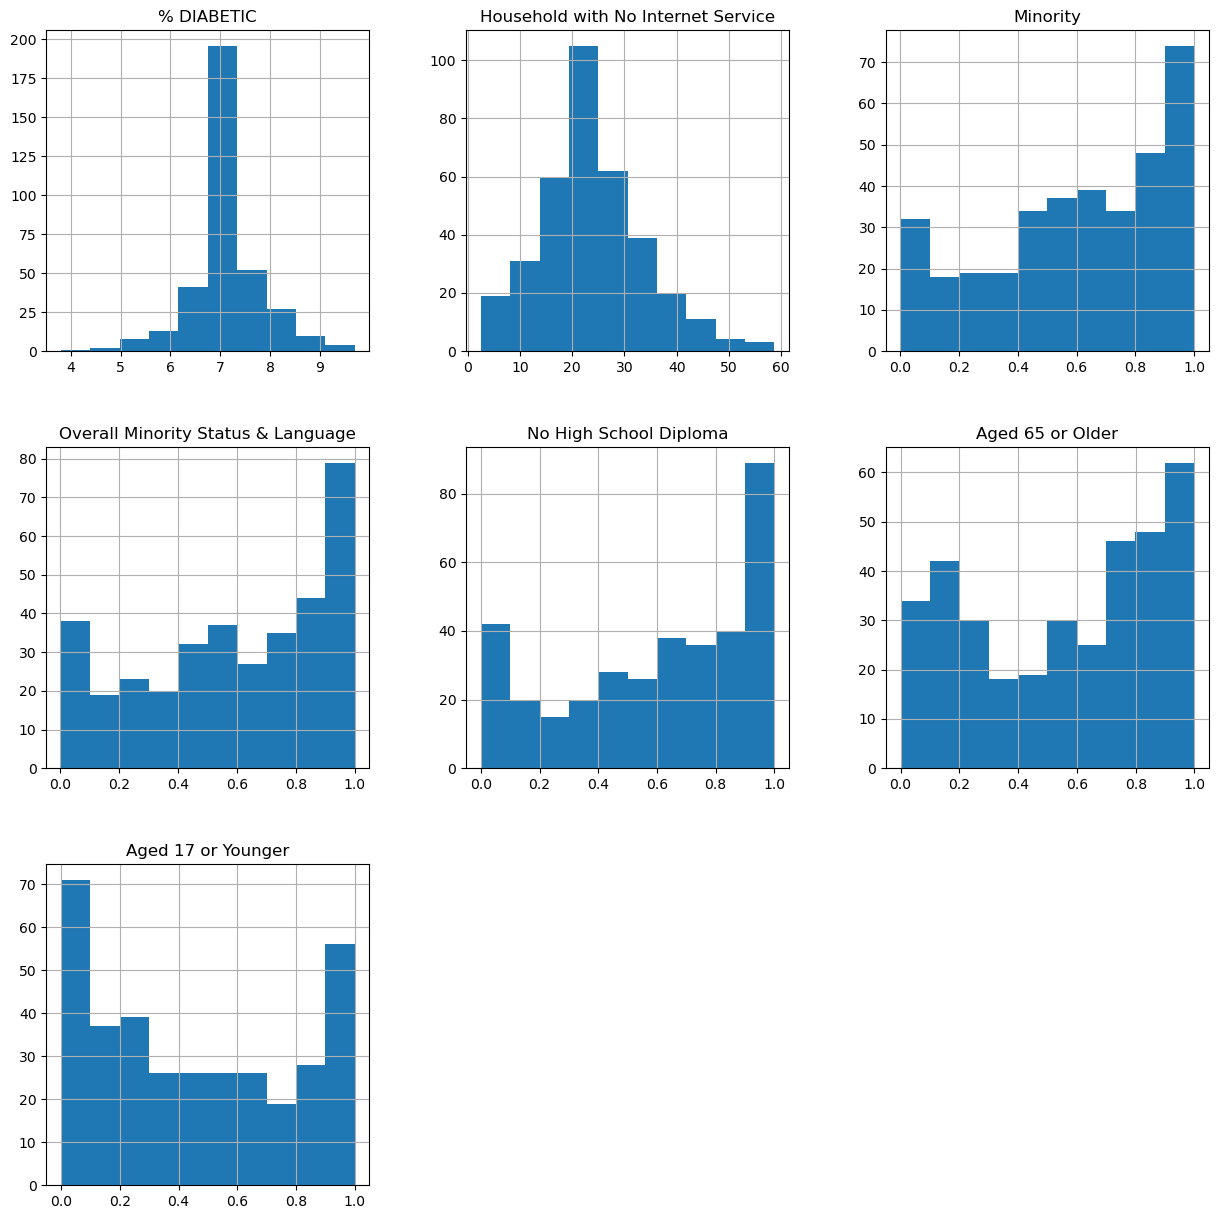

In [17]:
svidataset.hist(figsize=(15, 15))
plt.show()

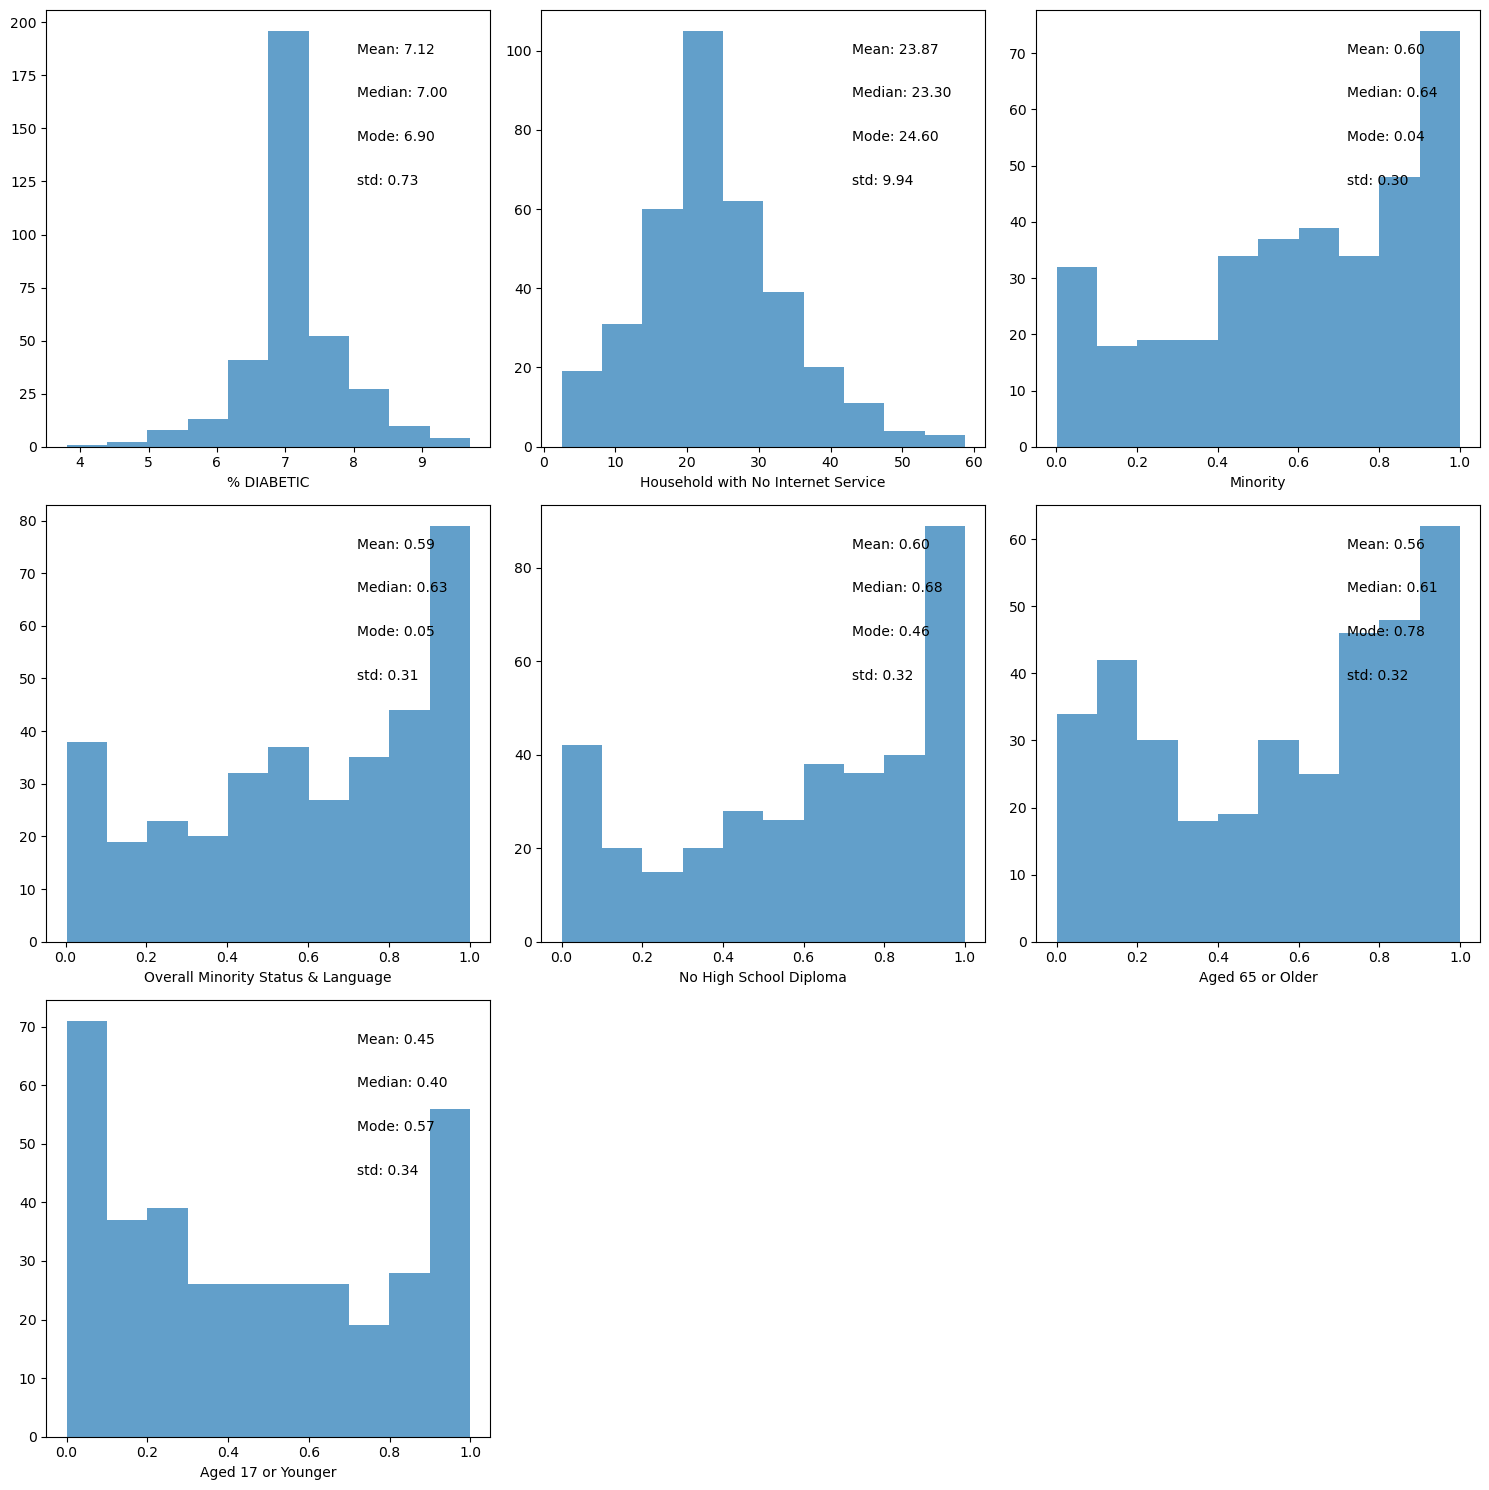

In [48]:
num_columns = len(svidataset.columns)
num_rows = (num_columns + 2) // 3  
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(svidataset.columns):
    ax = axes[i]
    ax.hist(svidataset[col], bins=10, alpha=0.7)
    ax.set_xlabel(col)

    mean_val = svidataset[col].mean()
    median_val = svidataset[col].median()
    mode_val=statistics.mode(svidataset[col])
    std_val=svidataset[col].std()
    ax.text(0.7, 0.9, f'Mean: {mean_val:.2f}', transform=ax.transAxes, fontsize=10)
    ax.text(0.7, 0.8, f'Median: {median_val:.2f}', transform=ax.transAxes, fontsize=10)
    ax.text(0.7, 0.7, f'Mode: {mode_val:.2f}', transform=ax.transAxes, fontsize=10)
    ax.text(0.7, 0.6, f'std: {std_val:.2f}', transform=ax.transAxes, fontsize=10)

for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

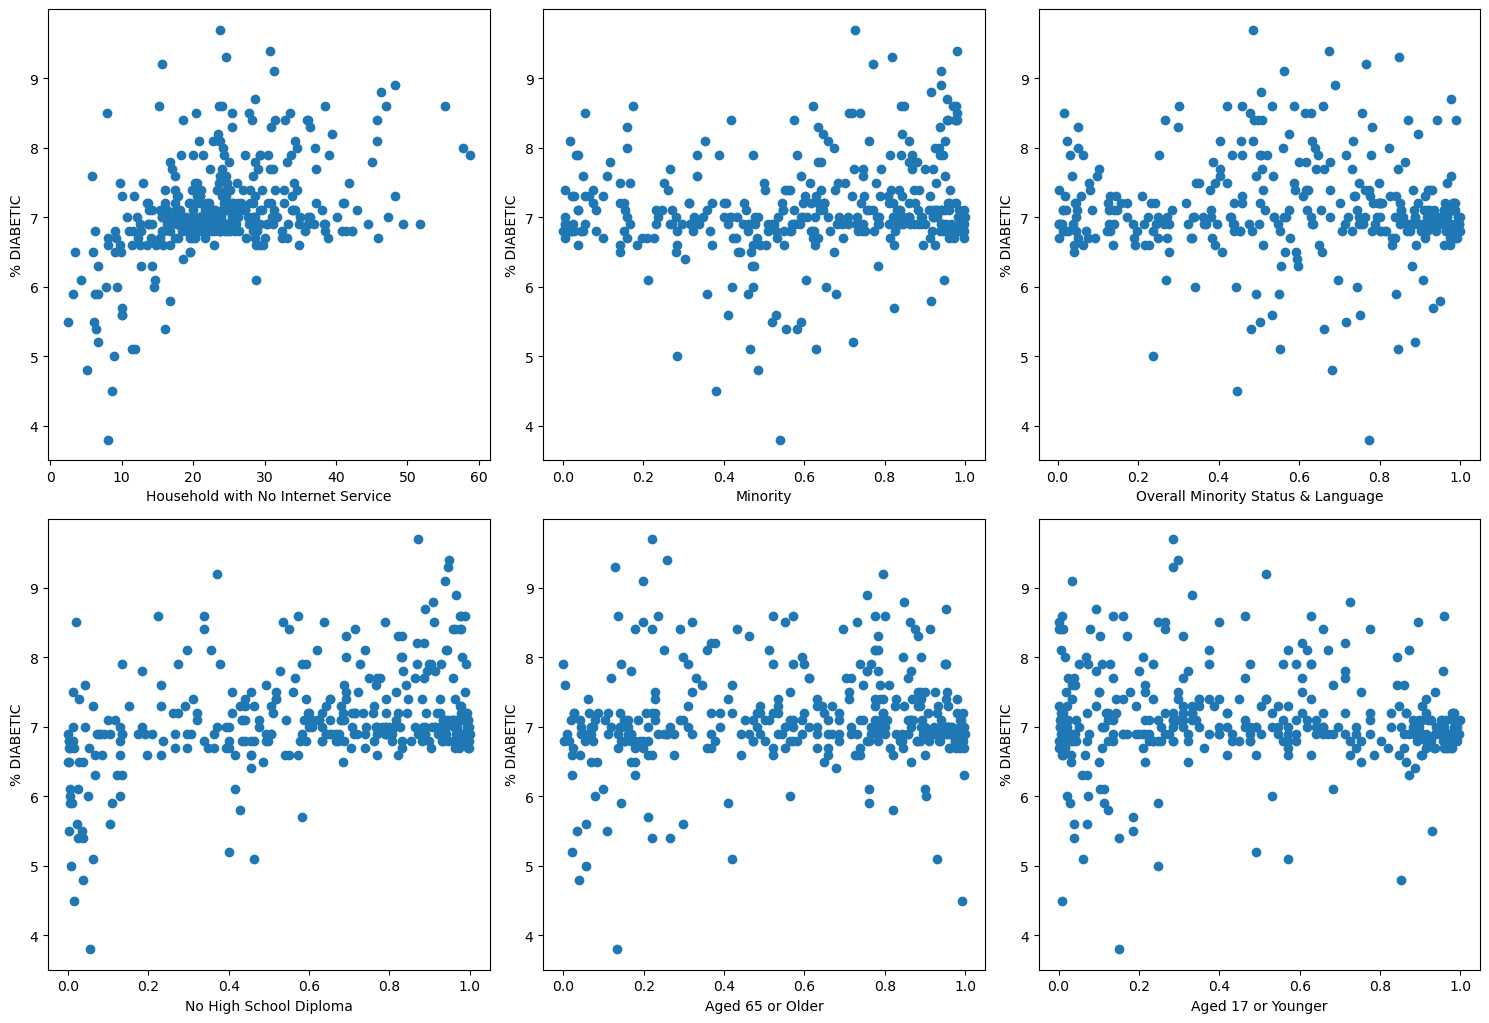

In [59]:
num_columns = len(svidataset.columns)
num_rows = (num_columns + 2) // 3  
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axes = axes.flatten()
columns_to_plot = [col for col in svidataset.columns if col != '% DIABETIC']
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.scatter(svidataset[col], final_dataset['% DIABETIC'])
    ax.set_xlabel(col)
    ax.set_ylabel('% DIABETIC')

for i in range(len(columns_to_plot), num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [20]:
svidataset.dtypes

% DIABETIC                            float64
Household with No Internet Service    float64
Minority                              float64
Overall Minority Status & Language    float64
No High School Diploma                float64
Aged 65 or Older                      float64
Aged 17 or Younger                    float64
dtype: object

In [21]:
from scipy.stats import skew
for col in svidataset.columns:
    skewness=skew(svidataset[col], axis=0, bias=True)
    print(col,skewness)

% DIABETIC -0.04881196867705582
Household with No Internet Service 0.5531860923039439
Minority -0.4820732158201683
Overall Minority Status & Language -0.39834342072558115
No High School Diploma -0.5163591282962997
Aged 65 or Older -0.26473483716609286
Aged 17 or Younger 0.2106044842705933


In [22]:
from scipy.stats import kurtosis
for col in svidataset.columns:
    kurtosisval=kurtosis(svidataset[col], axis=0, bias=True)
    print(col,kurtosisval)

% DIABETIC 2.7884224412882883
Household with No Internet Service 0.5959930729304799
Minority -0.91943141204198
Overall Minority Status & Language -1.103770700169454
No High School Diploma -1.0265526812098942
Aged 65 or Older -1.3798857692969648
Aged 17 or Younger -1.3763237158641213


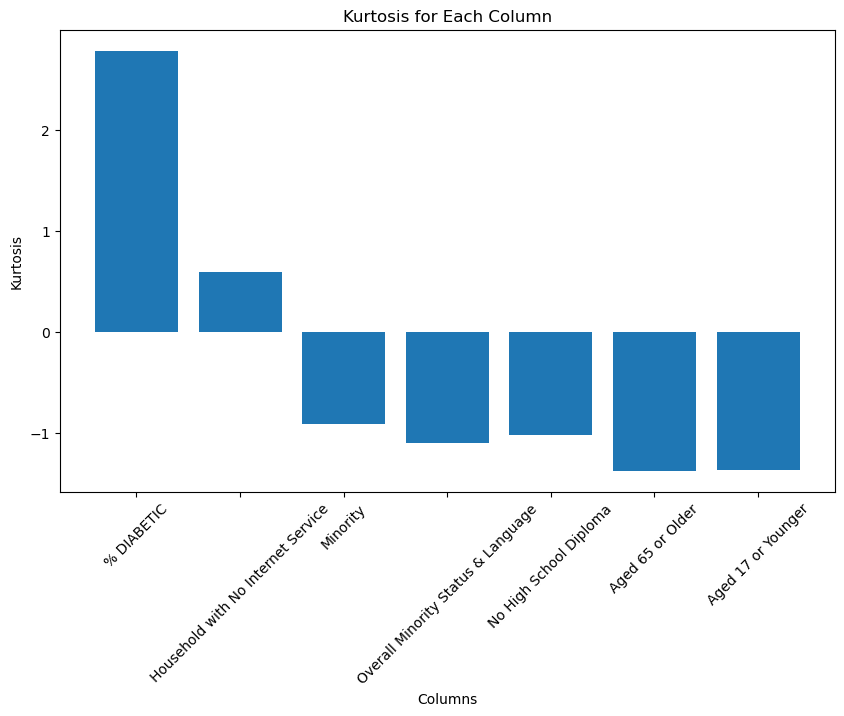

In [60]:
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Calculate kurtosis for each column
kurtosis_values = [kurtosis(svidataset[col], axis=0, bias=True) for col in svidataset.columns]

# Plot the kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(svidataset.columns, kurtosis_values)
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.title('Kurtosis for Each Column')
plt.xticks(rotation=45)
plt.show()


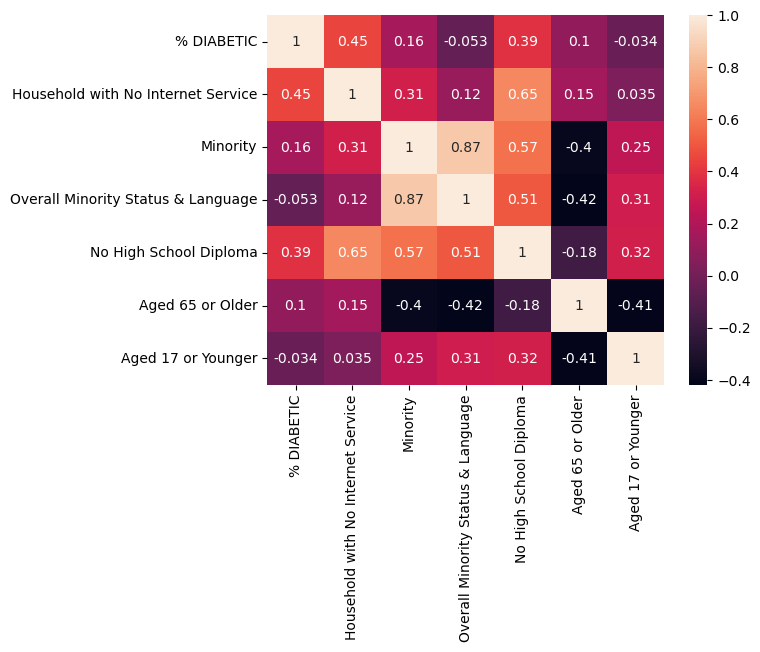

In [23]:
correlation_matrix = svidataset.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

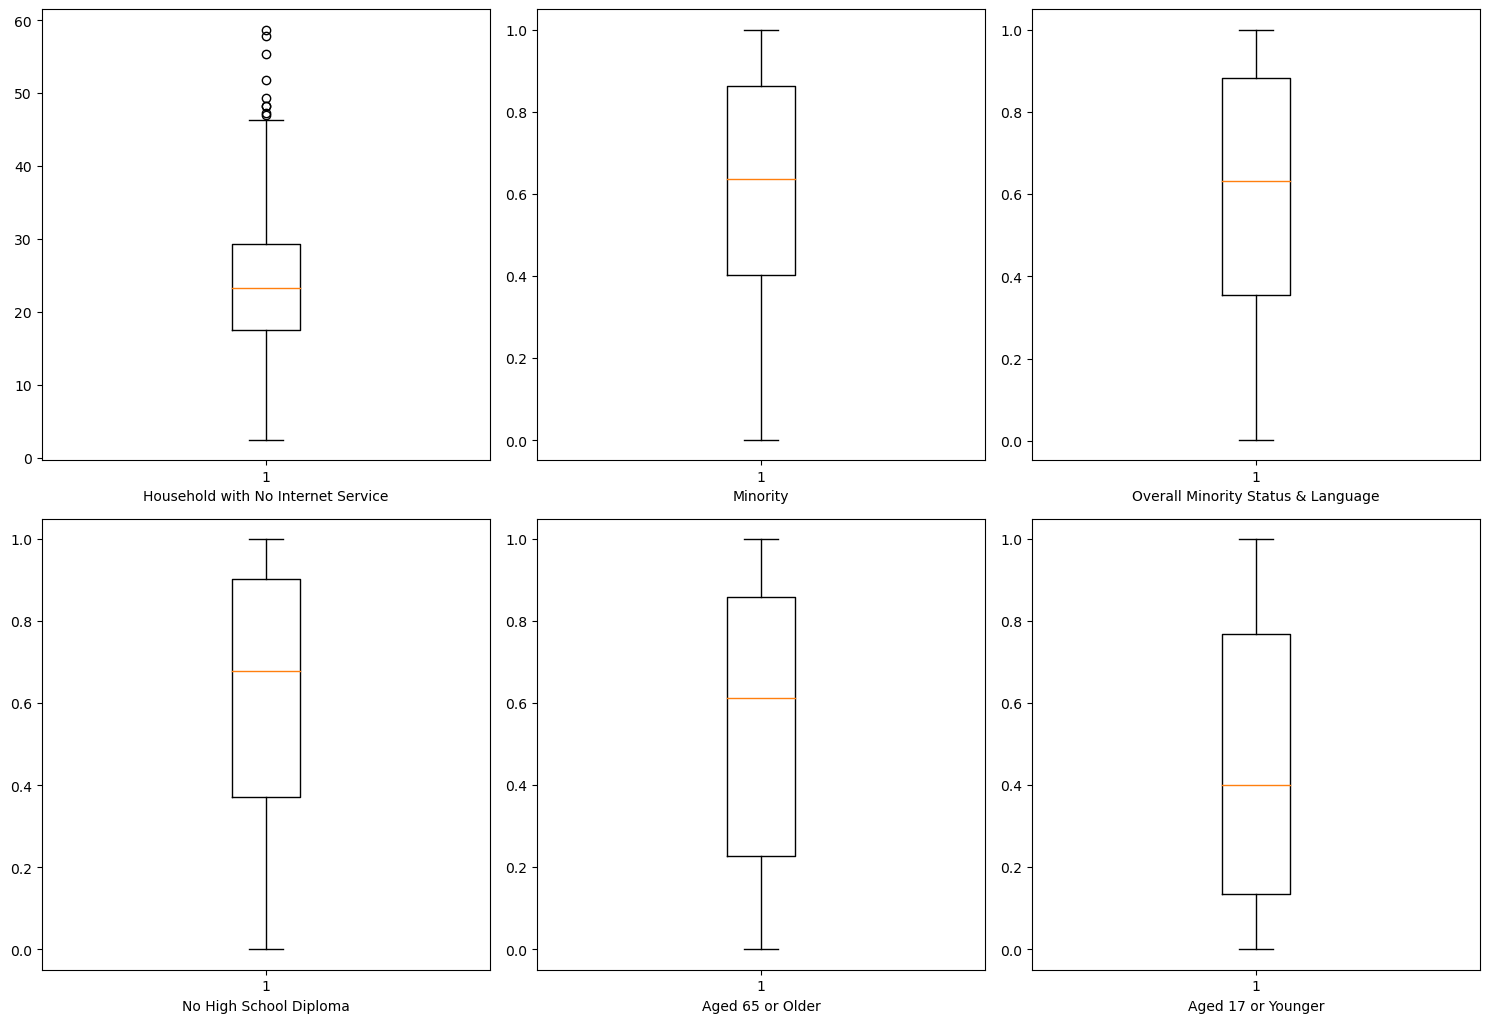

In [66]:
import matplotlib.pyplot as plt
import numpy as np

num_columns = len(svidataset.columns)
num_rows = (num_columns + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
columns_to_plot = [col for col in svidataset.columns if col != '% DIABETIC']

for i, col in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]  # Adjusted indexing to access correct Axes object
    data = svidataset[col]  # Extract the data for the current column
    ax.boxplot(data)
    ax.set_xlabel(col)

# Hide any extra empty subplots
for i in range(len(columns_to_plot), num_rows * 3):
    row = i // 3
    col = i % 3
    if row < num_rows:  # Check if this is a valid subplot
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


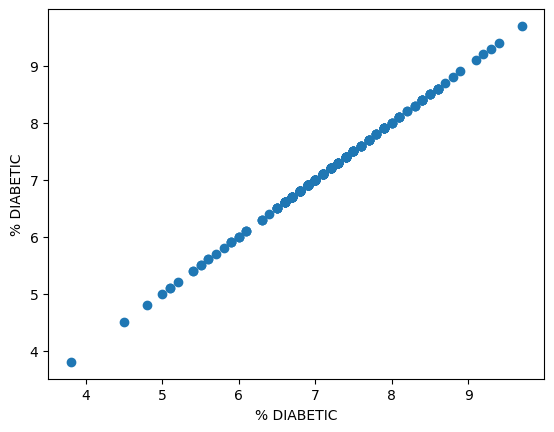

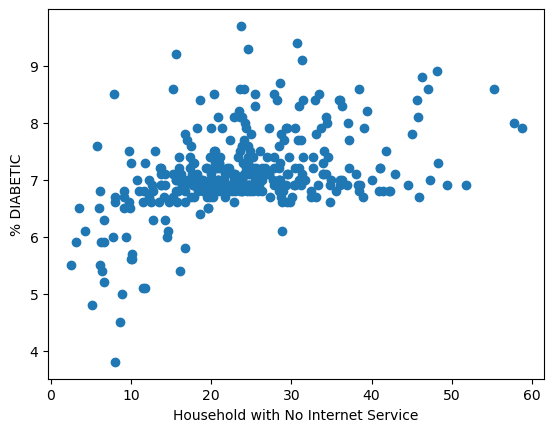

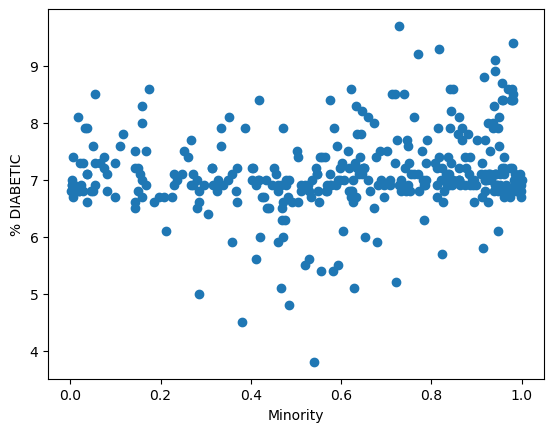

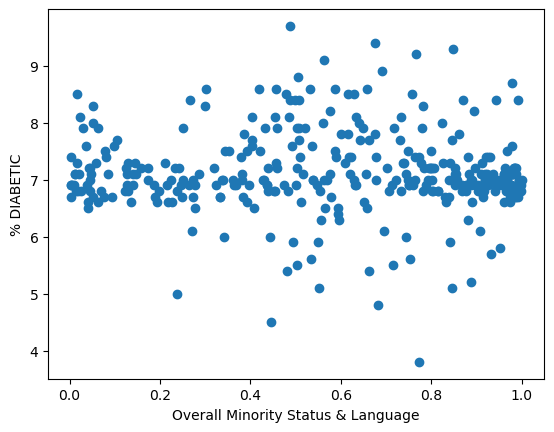

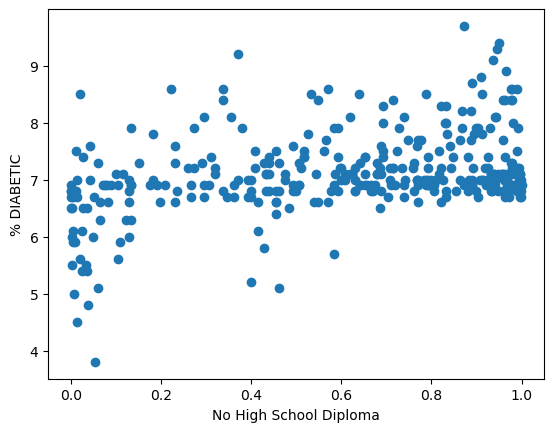

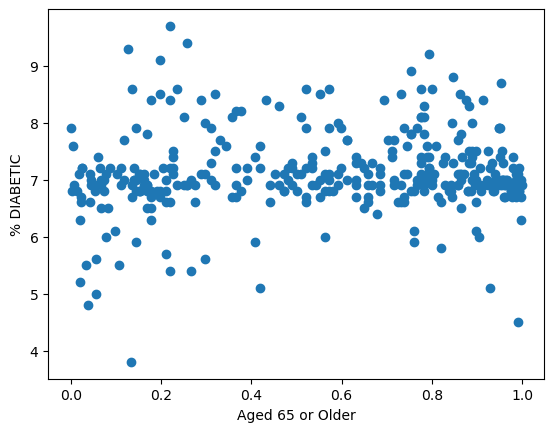

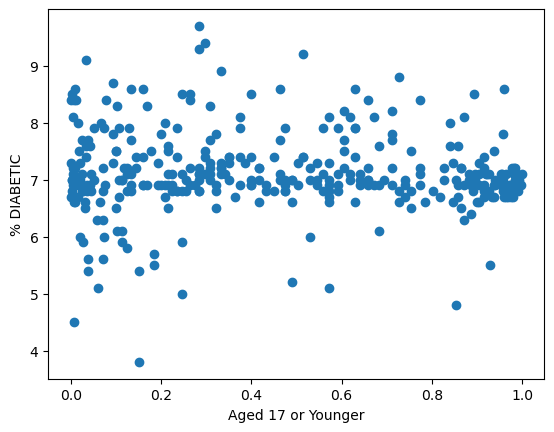

In [25]:
for col in svidataset.columns:
    plt.scatter(svidataset[col], svidataset['% DIABETIC'])
    plt.xlabel(col)
    plt.ylabel('% DIABETIC')
    plt.show()

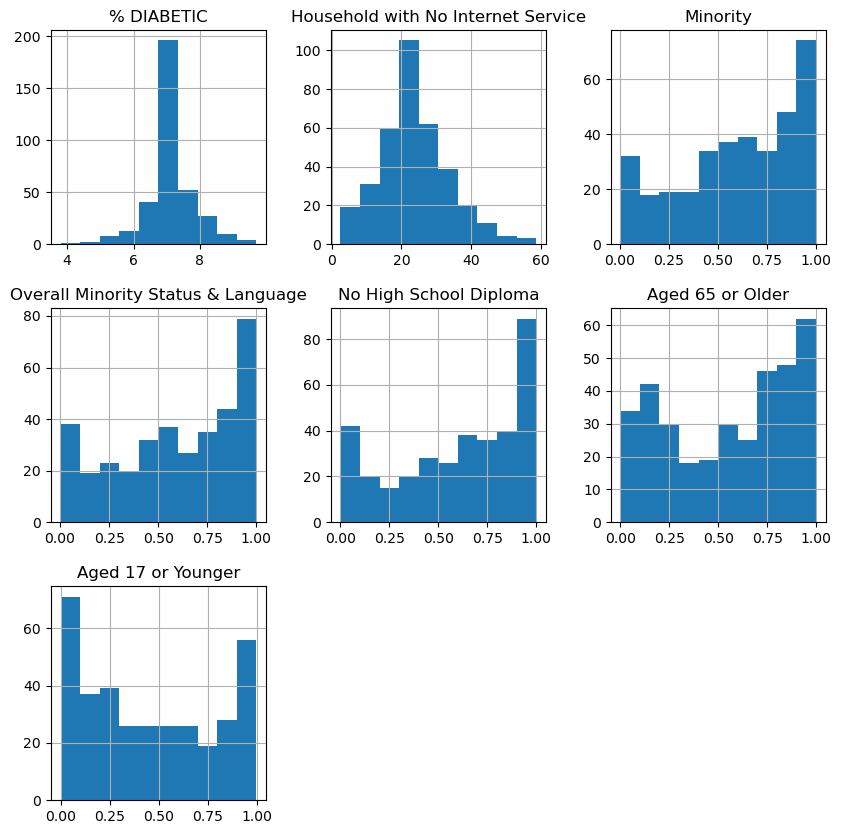

In [26]:
svidataset.hist(figsize=(10, 10))
plt.show()

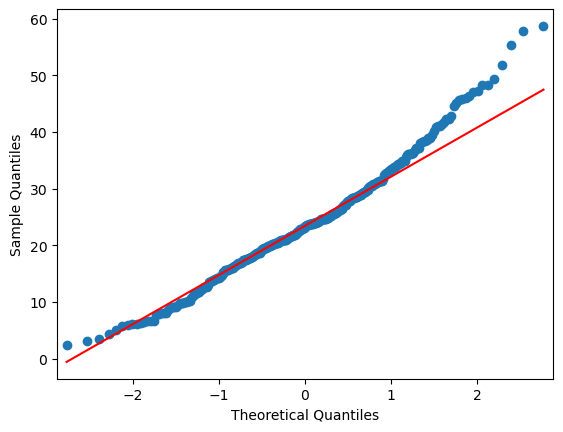

In [27]:
sm.qqplot(svidataset['Household with No Internet Service'],line='q')
py.show()

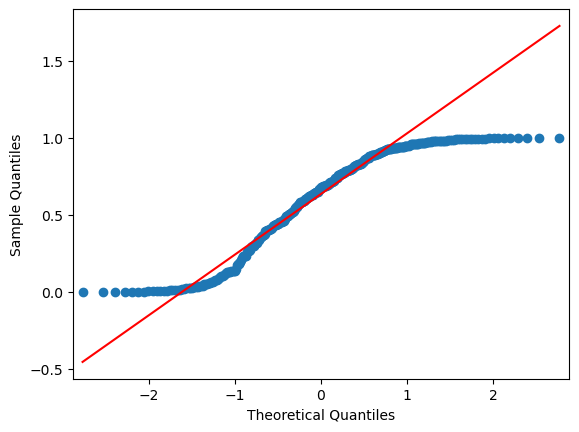

In [28]:
sm.qqplot(svidataset['No High School Diploma'],line='q')
py.show()

### Detecting and Removing Outliers

In [29]:
svidataset_col = [feature for feature in svidataset.columns ]

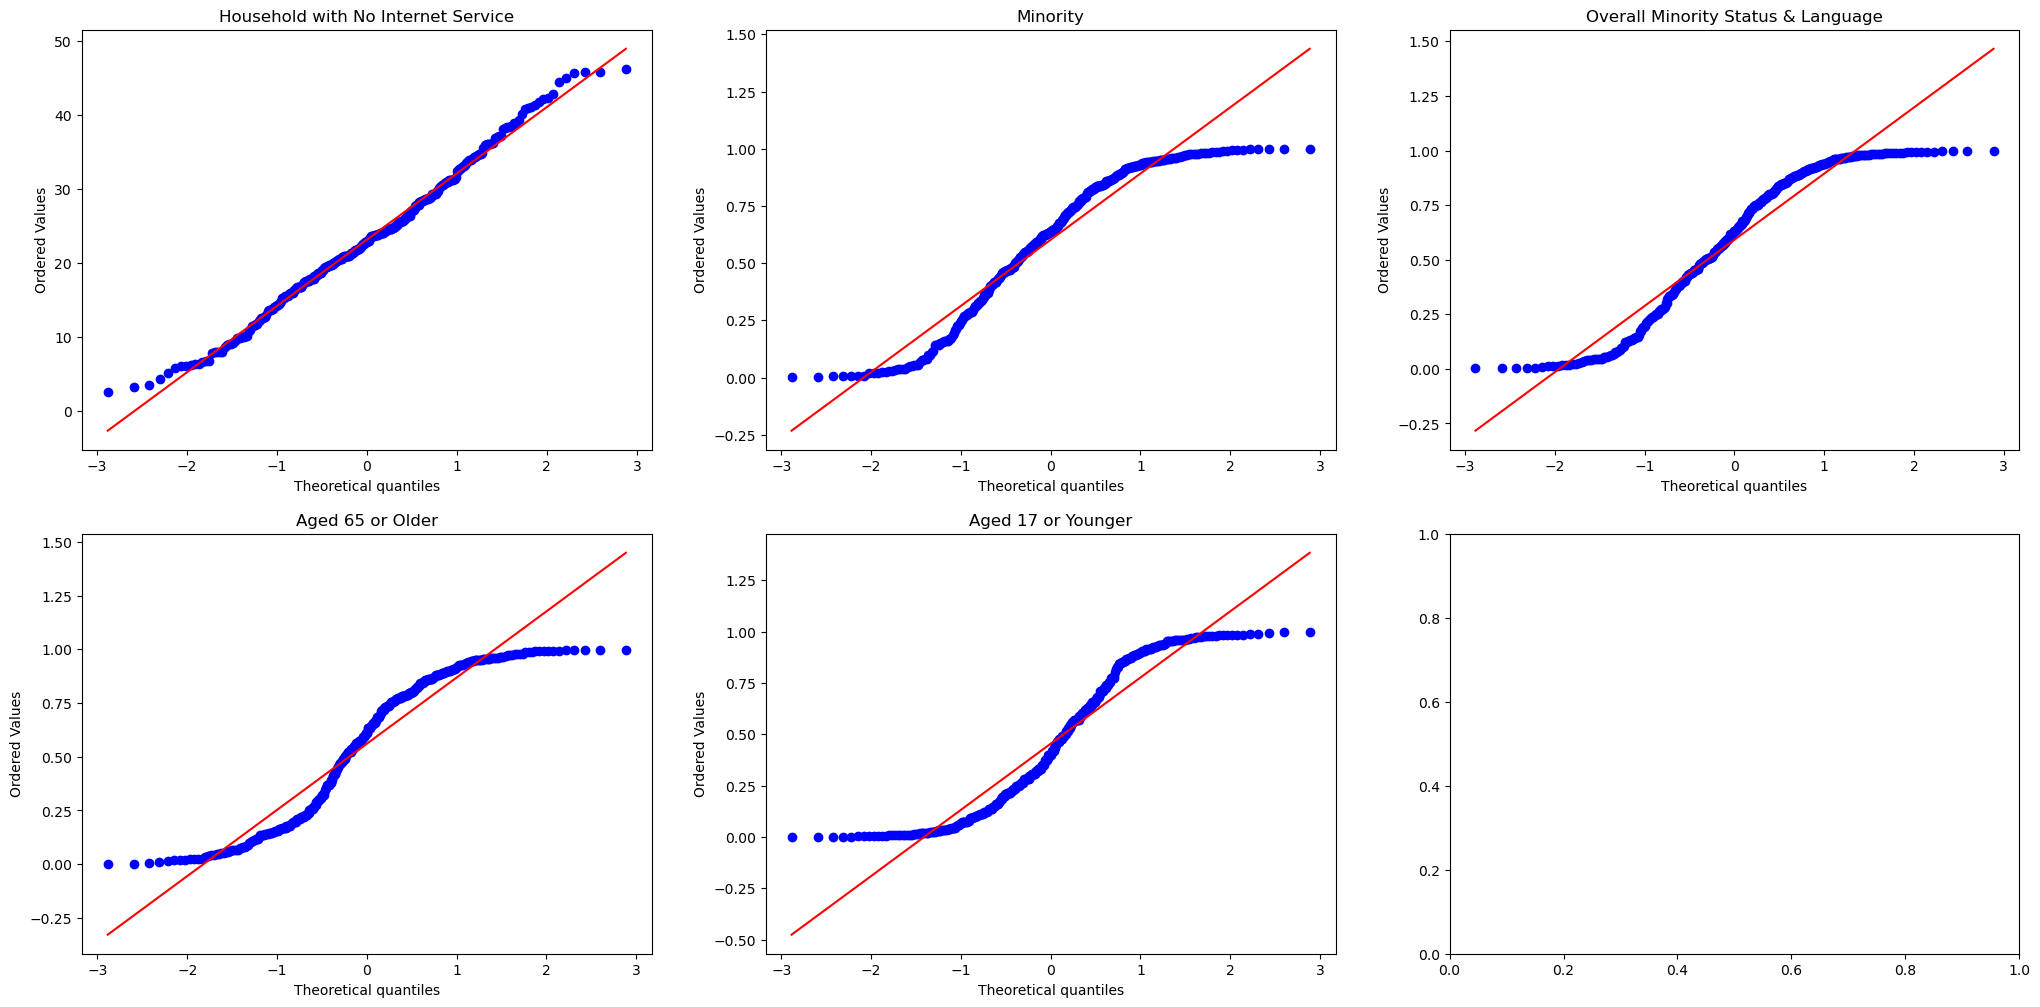

In [68]:
fig, ax = plt.subplots(2, int(len(svidataset_col) / 2), figsize=(25, 12))
row, coln = 0, 0
columns_to_plot = [col for col in svidataset.columns if col != '% DIABETIC']
for i, col_name in enumerate(columns_to_plot):
    Q1 = svidataset[col_name].quantile(0.25)
    Q3 = svidataset[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    svidataset_no = svidataset[(svidataset[col_name] >= lower_bound) & (svidataset[col_name] <= upper_bound)]

    if coln < ax.shape[1]:
        ax[row, coln].set_title(col_name)
        stats.probplot(x=svidataset_no[col_name], dist='norm', plot=ax[row, coln])
        ax[row, coln].set_title(col_name)
        coln += 1
    else:
        row += 1
        coln = 0

plt.show()

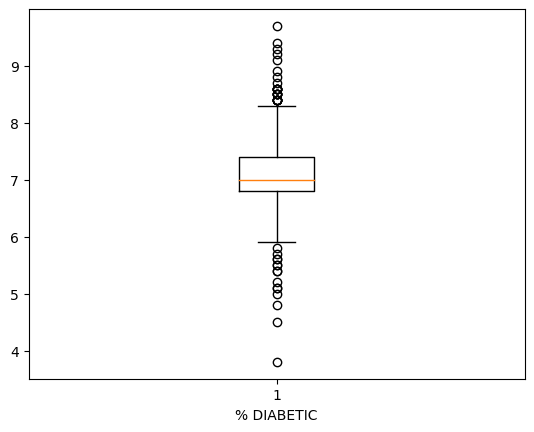

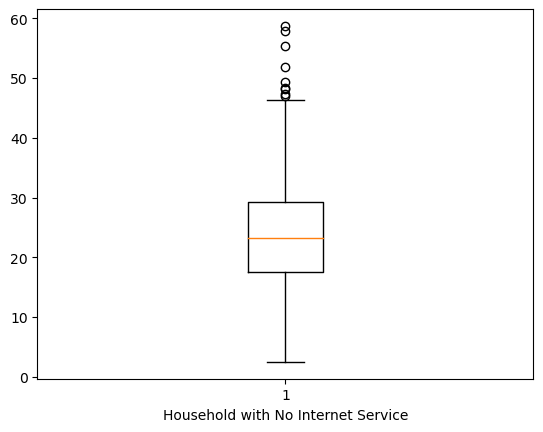

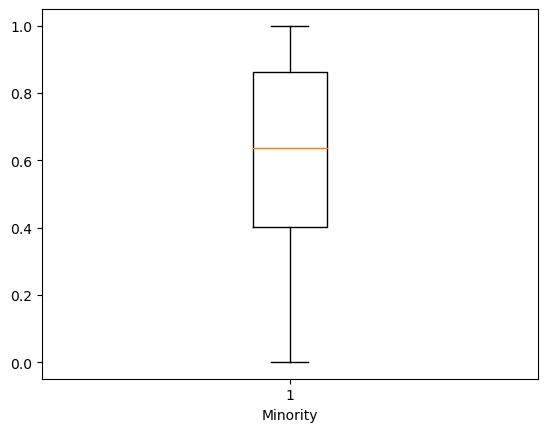

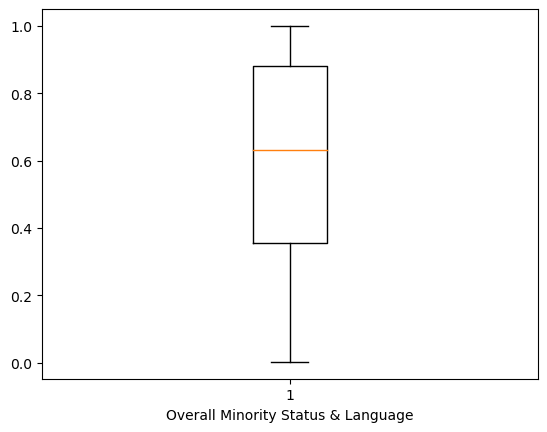

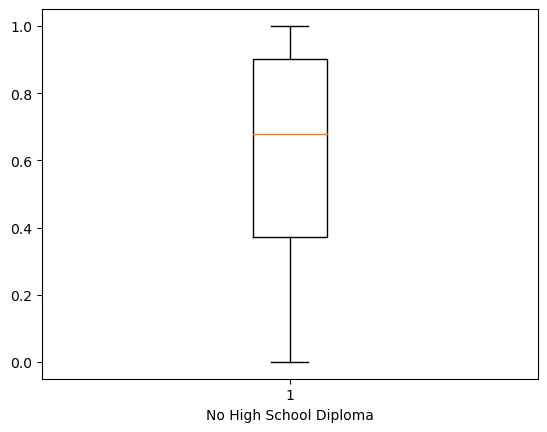

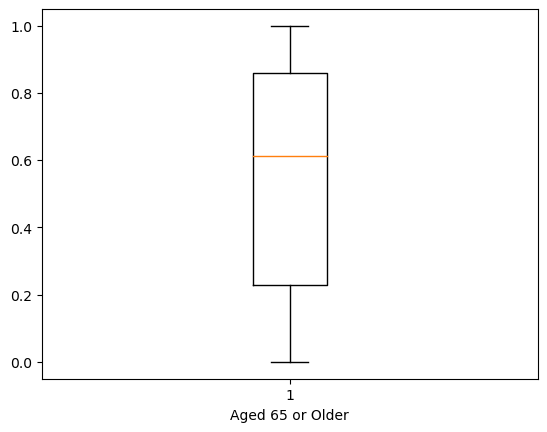

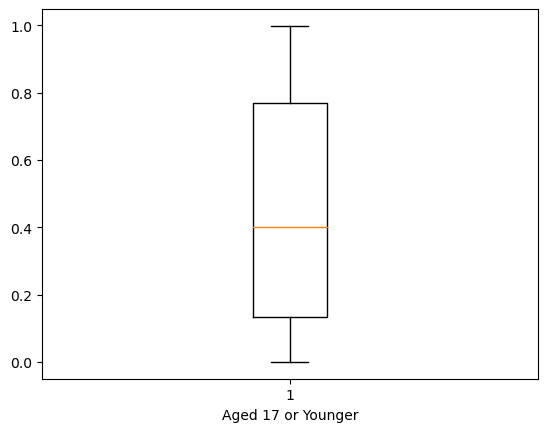

In [31]:
for col in svidataset_no.columns:
    data = svidataset_no[col]  # Extract the data for the current column
    plt.boxplot(data)
    plt.xlabel(col)  # Set the x-axis label to the column name
    plt.show()

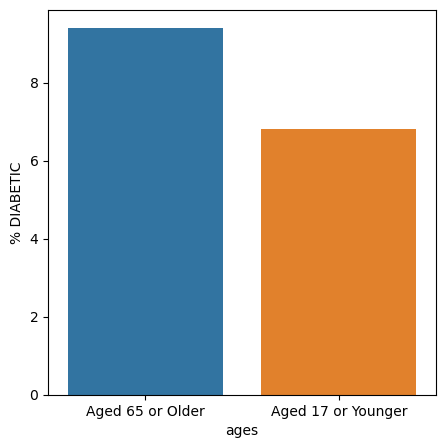

In [41]:
data = pd.DataFrame({'ages': ['Aged 65 or Older', 'Aged 17 or Younger']})

plt.figure(figsize = (5, 5))

ax = sns.barplot(x = 'ages', y =svidataset_no['% DIABETIC'], 
                 data = data)

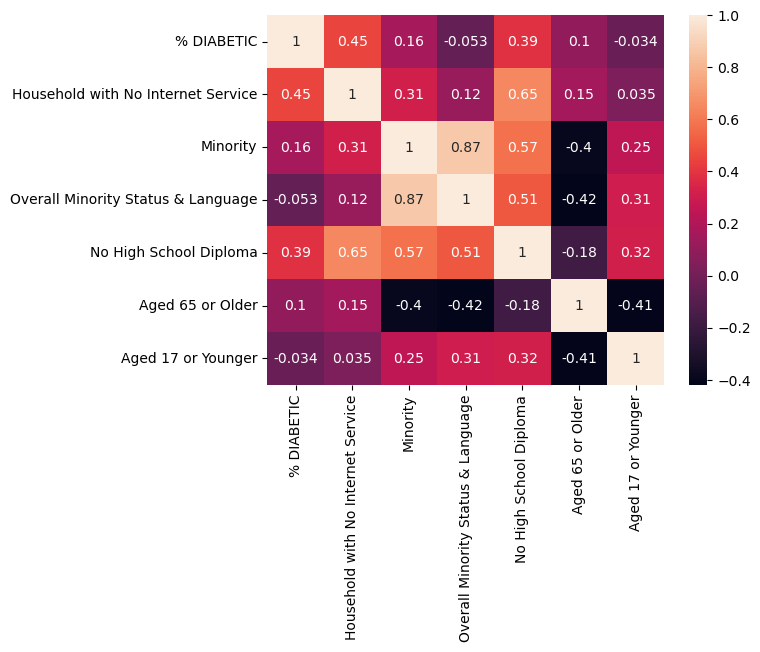

In [32]:
correlation_matrixno = svidataset_no.corr()
sns.heatmap(correlation_matrixno, annot=True)
plt.show()

In [37]:
correlation_matrixno

,% DIABETIC,Household with No Internet Service,Minority,Overall Minority Status & Language,No High School Diploma,Aged 65 or Older,Aged 17 or Younger
% DIABETIC,1.000000,0.446686,0.164608,-0.053318,0.386161,0.100574,-0.033715
Household with No Internet Service,0.446686,1.000000,0.312841,0.119459,0.647867,0.151899,0.035269
Minority,0.164608,0.312841,1.000000,0.870535,0.574678,-0.396872,0.251041
Overall Minority Status & Language,-0.053318,0.119459,0.870535,1.000000,0.505862,-0.419301,0.305638
No High School Diploma,0.386161,0.647867,0.574678,0.505862,1.000000,-0.177058,0.316887
Aged 65 or Older,0.100574,0.151899,-0.396872,-0.419301,-0.177058,1.000000,-0.408388
Aged 17 or Younger,-0.033715,0.035269,0.251041,0.305638,0.316887,-0.408388,1.000000


### Hypothesis Testing

### The Kruskal-Wallis Test(ktest): It tests the hypothesis that the supplied samples were all drawn from the same distribution. The test relies only on the relative ranks of the observations in the combined sample. It does not rely on any properties of the distributions.

In [33]:
Ktest = stats.kruskal(svidataset_no['Household with No Internet Service'],svidataset['No High School Diploma'],final_dataset['% DIABETIC'])
print(Ktest)

KruskalResult(statistic=907.8251826048087, pvalue=7.383568884573754e-198)


In [34]:
from scipy.stats import mannwhitneyu
stat, p_value = stats.ttest_ind(svidataset_no['Household with No Internet Service'], final_dataset['% DIABETIC'])
print('Statistics=%.2f, p=%.2f' % (stat, p_value))

Statistics=31.65, p=0.00


In [35]:
import scipy.stats as stats
stat, p_value = stats.ttest_ind(svidataset_no['No High School Diploma'], final_dataset['% DIABETIC'])
print('Statistics=%.2f, p=%.2f' % (stat, p_value))

Statistics=-153.79, p=0.00


### Multiple Regression

In [36]:
columns_to_use = ['Household with No Internet Service', 'Minority', 'Overall Minority Status & Language', 'No High School Diploma', 'Aged 65 or Older', 'Aged 17 or Younger']

# Extract the specified columns from the DataFrame
X = svidataset_no[columns_to_use]
y = svidataset_no['% DIABETIC']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))
model = LinearRegression()
model.fit(X, y)

# Predict on the same data
y_pred = model.predict(X)

# Evaluate the model
mse = r2_score(y, y_pred)
print("r2_score:", mse)

r2_score: 0.3331665150911689
